# Inmersión alura

## Clase 2

In [77]:
# importación de módulos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# cargar el data set
inmuebles = pd.read_csv('../data/inmuebles_bogota.csv')
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [79]:
# cambiar nombres de columnas
columnas = {'Baños': 'Banos', 'Área': 'Area'} # diccionario con nuevos nombres
inmuebles = inmuebles.rename(columns=columnas)

In [80]:
# muestra aleatoria del set de datos
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
8642,Apartamento,Apartamento en venta en Chapinero,1,2,57,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 355.000.000
7395,Apartamento,Apartamento en venta en Zona Noroccidental,2,2,58,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 309.000.000
8977,Casa,Casa en venta en Chapinero,3,2,228,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 2.500.000.000
5536,Apartamento,Apartamento en venta en Santa Barbara,3,2,174,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 750.000.000
3815,Apartamento,Apartamento en venta en Mazuren,3,2,120,Mazuren,El Prado,$ 390.000.000
4558,Apartamento,Apartamento en venta en Usaquén,3,3,128,Usaquén,Usaquén,$ 590.000.000
3708,Apartamento,Apartamento en venta en Santa Fe,1,1,51,Santa Fe,SANTA FE: Las Nieves + Sagrado Corazón,$ 207.200.000
3674,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,49,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 153.000.000
8770,Apartamento,Apartamento en venta en Cedritos,1,2,54,Cedritos,Usaquén,$ 355.000.000
7474,Apartamento,Apartamento en venta en Tintala,3,2,63,Tintala,Tintala,$ 255.000.000


In [81]:
# limpiar valores y cambiar tipo de dato en columna Valor
valor = inmuebles.Valor.str.split(expand=True) # separar valores. expand True devuelve en formato de DF
# añadir columnas al dataset
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]

inmuebles['Precio'].sample(3)

886       350.000.000
8205      700.000.000
3521    1.250.000.000
Name: Precio, dtype: object

In [82]:
# eliminar caracteres especiales
inmuebles['Precio'] = inmuebles['Precio'].replace({'[^0-9]':''}, regex = True).str.strip()
inmuebles['Precio'].sample(5)

5526    1300000000
7614     465000000
315      308000000
5727     422000000
2762     128000000
Name: Precio, dtype: object

In [83]:
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [84]:
# cambia tipo de dato a float y elimina 6 ceros para facilitar visualizacion
inmuebles['Precio_Millon'] = inmuebles['Precio'].astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [85]:
# datos estadísticos de columnas numéricas
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [86]:
# eliminar posiciones decimales
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [87]:
# ubicar un dato
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


<Axes: ylabel='Frequency'>

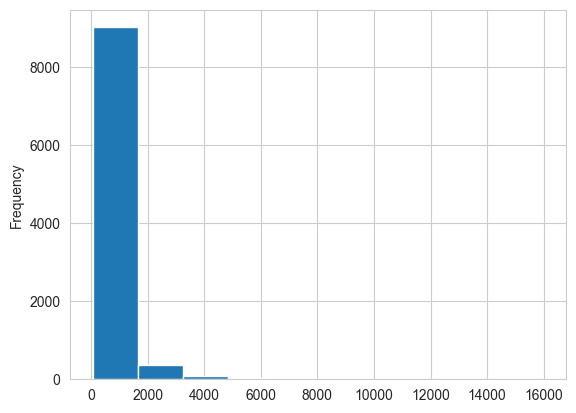

In [88]:
# histograma precio inmuebles
inmuebles['Precio_Millon'].plot.hist(bins = 10)

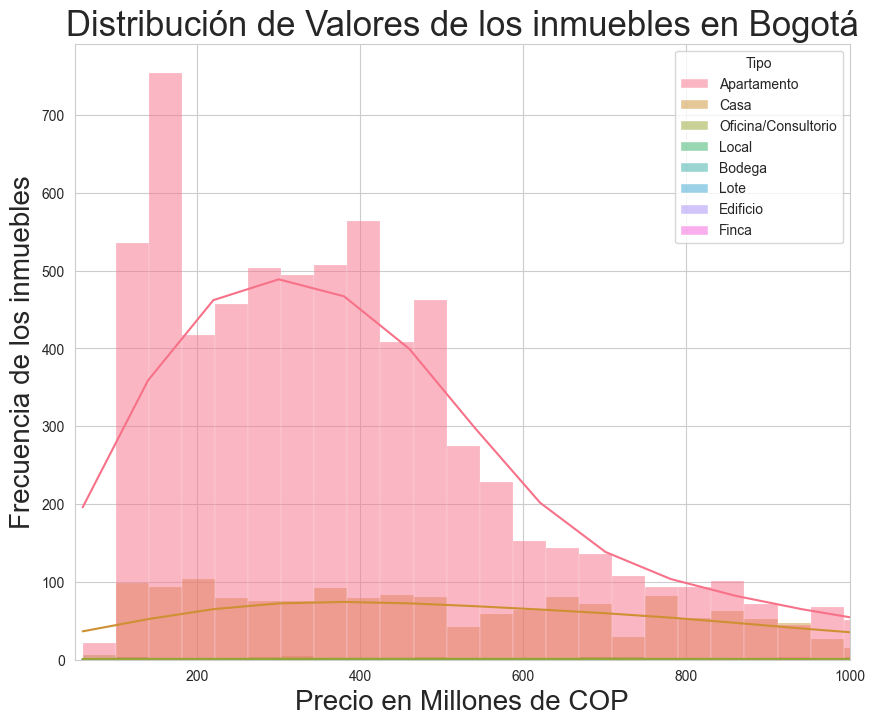

In [89]:
# superficie donde se realiza el gráfico
plt.figure(figsize=(10,8)) # figsize = (ancho, altura)
sns.set_style("whitegrid")
g1 = sns.histplot(data = inmuebles, x = 'Precio_Millon', kde = True, hue='Tipo', palette='husl') 
# kde: kernel density estimate (KDE) represents the data using a continuous probability density curve in one or more dimensions.
g1.set_title('Distribución de Valores de los inmuebles en Bogotá', fontsize=25)
# límite eje x
plt.xlim((50, 1000)) # para el primer valor se toma un número cercano al valor mínimo
plt.xlabel("Precio en Millones de COP", fontsize=20)
plt.ylabel("Frecuencia de los inmuebles", fontsize=20)
#plt.savefig('valor_inmuebles.png', format='png')
plt.show()

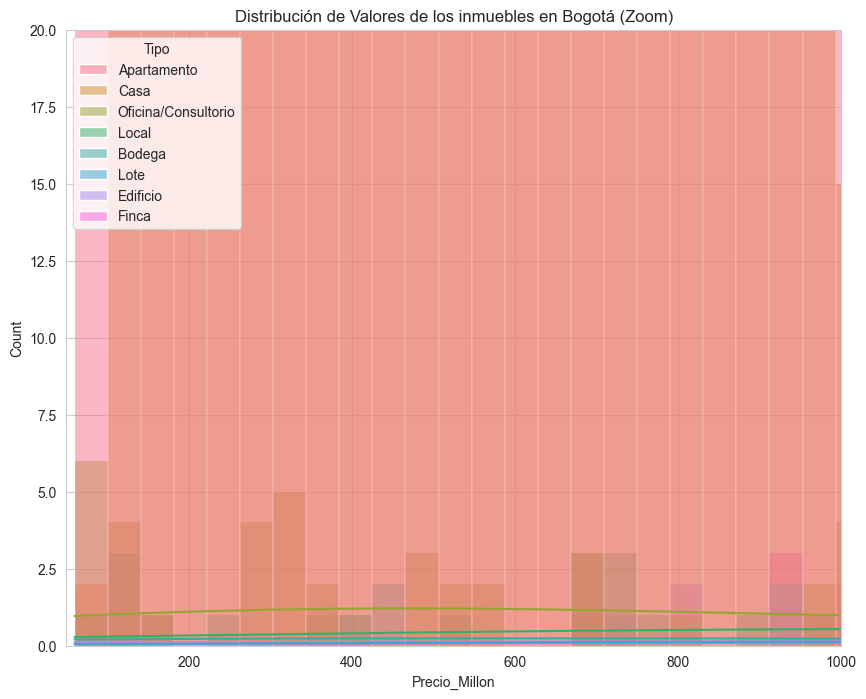

In [90]:
plt.figure(figsize=(10,8)) # figsize = (ancho, altura)
sns.set_style("whitegrid")
g2 = sns.histplot(data = inmuebles, x = 'Precio_Millon', kde = True, hue='Tipo', palette='husl') 
# kde: 
g2.set_title('Distribución de Valores de los inmuebles en Bogotá (Zoom)')
# límite eje x
plt.xlim((50, 1000)) # para el primer valor se toma un número cercano al valor mínimo
plt.ylim((0,20))
plt.show()

In [91]:
# export modify dataframe
inmuebles.to_csv('../data/inmuebles_bogota_mod.csv')

## Desafíos
1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

### Tarea 1
Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

In [92]:
# cantidad de inmuebles por tipo
print(inmuebles.Tipo.value_counts(normalize= True))
inmuebles.Tipo.value_counts().sort_values()

Tipo
Apartamento           0.77
Casa                  0.21
Oficina/Consultorio   0.01
Local                 0.00
Edificio              0.00
Bodega                0.00
Finca                 0.00
Lote                  0.00
Name: proportion, dtype: float64


Tipo
Lote                      6
Finca                    11
Bodega                   13
Edificio                 22
Local                    38
Oficina/Consultorio      60
Casa                   2043
Apartamento            7327
Name: count, dtype: int64

In [93]:
# crear un máscara para seleccionar los tres tipos de inmuebles elegidos
mask = (inmuebles['Tipo'] == 'Lote') | (inmuebles['Tipo'] == 'Finca') | (inmuebles['Tipo'] == 'Bodega')
# aplicar la máscara en el DF inmuebles y asignarlo a un nuevo DF
down_3 = inmuebles[mask]
# mostrar resumen de estadísticas
down_3.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,30.00,30.00,30.00,30.00
mean,4.07,4.33,1057.63,1530.06
std,1.87,2.59,2176.66,1296.93
min,1.00,1.00,19.00,120.00
25%,3.00,2.00,168.00,939.28
50%,4.00,4.00,380.00,1050.00
75%,6.00,6.00,786.50,2080.00
max,8.00,9.00,8884.00,5000.00


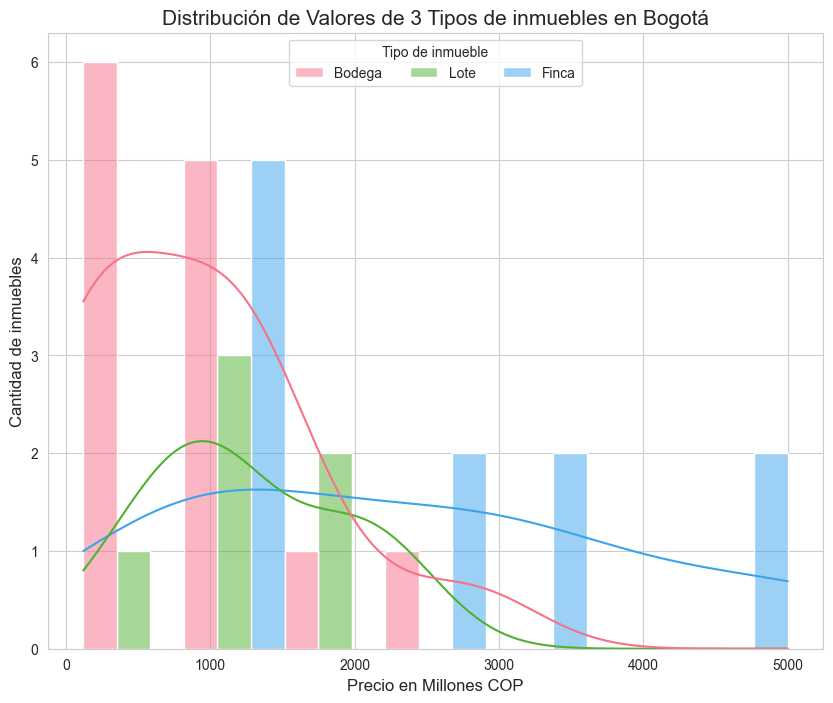

In [94]:
plt.figure(figsize=(10,8)) # figsize = (ancho, altura)
sns.set_style("whitegrid")
g3 = sns.histplot(data = down_3, x = 'Precio_Millon', kde = True, hue='Tipo', palette='husl', multiple='dodge') 
g3.set_title('Distribución de Valores de 3 Tipos de inmuebles en Bogotá', fontsize=15)
plt.ylabel('Cantidad de inmuebles', fontsize=12)
plt.xlabel('Precio en Millones COP', fontsize =12)
sns.move_legend(g3, loc='upper center', ncol=3, title='Tipo de inmueble')
plt.show()

La mayoría de las bodegas, tienen un valor mayor a los 1000M COP. Más de la mitad de las fincas que hay en el data set, cuestan más de 2000M COP. El precio de los lotes no es mayor a 2000M COP.

### Tarea 2
Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

In [95]:
# suma de los valores de Area y Precio_Millon por barrio
acumulado_barrios = inmuebles.groupby('Barrio')[['Area', 'Precio_Millon']].sum()
acumulado_barrios

,Area,Precio_Millon
Barrio,,
Alameda,97,580.00
Alhambra,3237,12790.00
Andes Norte,874,4967.00
Antonio Nariño,7827,22042.65
Barrancas,1053,4712.00
...,...,...
Villa Maria,2693,5237.00
Villas De Granada,1905,6210.62
Villemar,1384,5469.00


In [96]:
# precio del metro cuadrado por barrio
acumulado_barrios['Precio_m2'] = acumulado_barrios['Precio_Millon']/acumulado_barrios['Area']
acumulado_barrios.head(10)

,Area,Precio_Millon,Precio_m2
Barrio,,,
Alameda,97,580.00,5.98
Alhambra,3237,12790.00,3.95
Andes Norte,874,4967.00,5.68
Antonio Nariño,7827,22042.65,2.82
Barrancas,1053,4712.00,4.47
Barrios Unidos,87799,259877.76,2.96
Bella Suiza,12264,77147.31,6.29
Bellavista Occidental,1431,3610.00,2.52
Bochica,537,1830.00,3.41


In [97]:
m2_barrio = acumulado_barrios.reset_index()[['Barrio','Precio_m2']]
m2_barrio

,Barrio,Precio_m2
0,Alameda,5.98
1,Alhambra,3.95
2,Andes Norte,5.68
3,Antonio Nariño,2.82
4,Barrancas,4.47
...,...,...
144,Villa Maria,1.94
145,Villas De Granada,3.26
146,Villemar,3.95
147,Zona Franca,2.96


In [98]:
# En qué zona de Bogotá se ubica cada barrio
# cargar data set original para extraer la zona en la que se ubica el inmueble
inmuebles_original = pd.read_csv('../data/inmuebles.csv')
inmuebles_original.info() # verifica que tiene mismo número de filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Localizacion  9520 non-null   object
 3   Atributos     9520 non-null   object
 4   Valor         9520 non-null   object
dtypes: object(5)
memory usage: 372.0+ KB


In [99]:
inmuebles_original.sample(5)

,Tipo,Descripcion,Localizacion,Atributos,Valor
2139,Apartamento,Apartamento en venta en Chico Reservado,"Chico Reservado, Chapinero, Zona Chapinero, Bo...",3 habitaciones4 baños164 m²,$ 1.200.000.000
2529,Apartamento,Apartamento en venta en Chico Reservado,"Chico Reservado, Chapinero, Zona Chapinero, Bo...",3 habitaciones3 baños239 / 239 m²,$ 2.530.000.000
8253,Casa,Casa en venta en Engativa,"Engativa, Zona Occidental, Bogotá D.C, Cundina...",4 habitaciones5 baños200 / 200 m²,$ 680.000.000
690,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",2 habitaciones3 baños59 m²,$ 435.600.000
8437,Apartamento,Apartamento en venta en Los Rosales,"Los Rosales, Chapinero, Zona Chapinero, Bogotá...",1 habitación2 baños61 / 61 m²,$ 596.614.000


Las zonas es encuentran en la columna Localización.

In [100]:
# dividir el objeto de la columna localizacion en las comas
localizacion = inmuebles_original['Localizacion'].str.split(',') 
localizacion

0        [Zona Noroccidental,  Bogotá D.C,  Cundinamarca]
1       [Castilla,  Kennedy,  Zona Suroccidental,  Bog...
2       [Chico Reservado,  Chapinero,  Zona Chapinero,...
3       [Usaquén,  Zona Norte,  Bogotá D.C,  Cundinama...
4       [Bella Suiza,  Usaquén,  Zona Norte,  Bogotá D...
                              ...                        
9515    [Kennedy,  Zona Suroccidental,  Bogotá D.C,  C...
9516    [Parque Central Bavaria,  Santa Fe,  Zona Cent...
9517    [Restrepo,  Antonio Nariño,  Zona Sur,  Bogotá...
9518    [Engativa,  Zona Occidental,  Bogotá D.C,  Cun...
9519    [Tintala,  Kennedy,  Zona Suroccidental,  Bogo...
Name: Localizacion, Length: 9520, dtype: object

In [101]:
# funcion para extraer la zona de la lista
def get_zone(lst):
    for element in lst:
        if 'zona' in element.lower():
            return element.strip()
    return None

# aplicar la funcion a la serie localizacion y crear una nueva columna con el resultado en el df inmuebles        
inmuebles['Zona'] = localizacion.apply(get_zone)
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Zona
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,Zona Noroccidental
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,Zona Suroccidental
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,Zona Chapinero
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,Zona Norte
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,Zona Norte


In [102]:
inmuebles['Zona'].unique() # zonas en el dataset

array(['Zona Noroccidental', 'Zona Suroccidental', 'Zona Chapinero',
       'Zona Norte', 'Zona Occidental', 'Zona Centro', 'Zona Sur', None,
       'Zona Franca'], dtype=object)

In [103]:
import numpy as np

In [104]:
# añadir precio del m2 al df
inmuebles = pd.merge(inmuebles, m2_barrio, on='Barrio')
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Zona,Precio_m2
2683,Casa,Casa en venta en Kennedy,8,4,120,Kennedy,Kennedy Central,$ 860.000.000,$,860000000,860.00,Zona Suroccidental,3.38
2085,Casa,Casa en venta en Usaquén,10,7,400,Usaquén,Usaquén,$ 1.700.000.000,$,1700000000,1700.00,Zona Norte,5.66
28,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,44,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 176.000.000,$,176000000,176.00,Zona Noroccidental,4.57
4634,Apartamento,Apartamento en venta en Engativa,3,2,87,Engativa,Engativá,$ 480.000.000,$,480000000,480.00,Zona Occidental,2.89
8814,Casa,Casa en venta en Cantagallo,4,3,69,Cantagallo,Britalia,$ 310.000.000,$,310000000,310.00,Zona Noroccidental,5.72


<Axes: xlabel='Area', ylabel='Precio_Millon'>

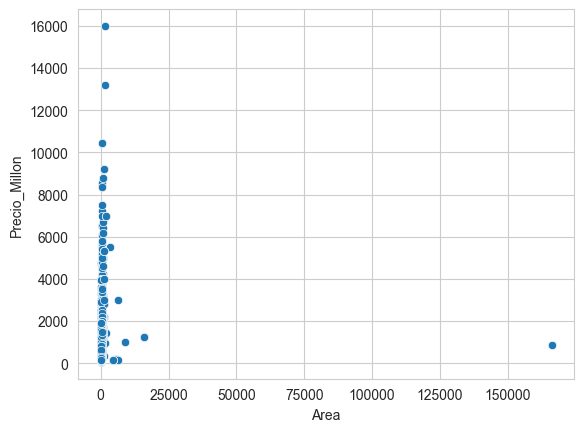

In [105]:
# gráfico precio vs area
sns.scatterplot(data=inmuebles, x='Area', y='Precio_Millon')

La columna Area tiene outliers, para tener un mejor resultado estos deben ser tratados.

<Axes: >

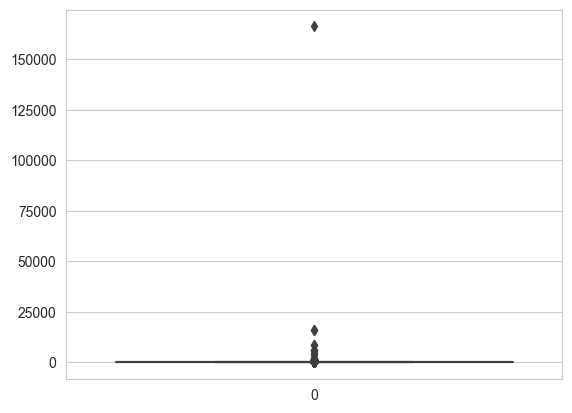

In [106]:
# diagrama de cajas del area para encontrar outliers
sns.boxplot(inmuebles['Area'])

In [107]:
# Detectar outliers

# IQR
# Calculate the upper and lower limits
Q1 = inmuebles['Area'].quantile(0.25)
Q3 = inmuebles['Area'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower, upper)

-60.0 252.0


In [108]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(inmuebles['Area']>=upper)[0]
lower_array = np.where(inmuebles['Area']<=lower)[0]
lower_array

array([], dtype=int64)

In [109]:
# Removing the outliers
inmuebles.drop(index=upper_array, inplace=True)

In [110]:
inmuebles.shape

(8576, 13)

<Axes: >

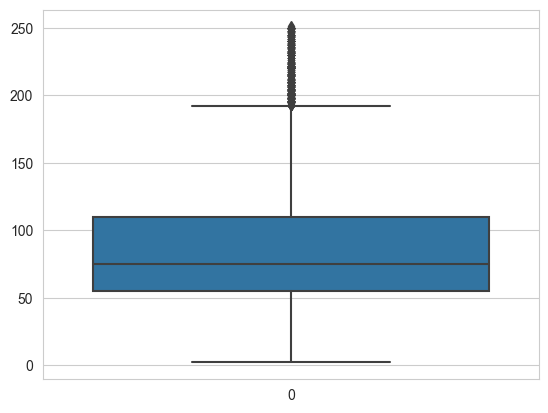

In [111]:
sns.boxplot(inmuebles['Area']) # verficar

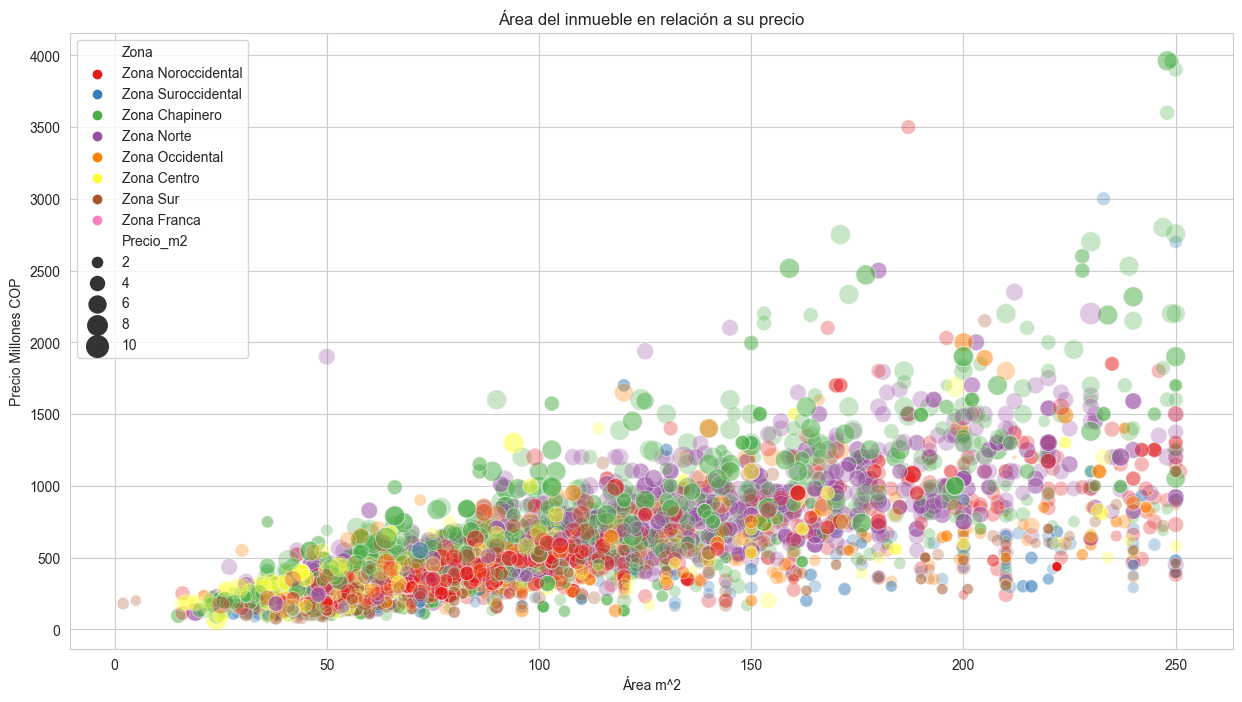

In [112]:
plt.figure(figsize=(15,8)) # figsize = (ancho, altura)
g4 = sns.scatterplot(data=inmuebles, x='Area', y='Precio_Millon', hue='Zona', size='Precio_m2', alpha=0.3, palette='Set1', sizes=(10, 250))
g4.set_title('Área del inmueble en relación a su precio')
sns.move_legend(g4, loc='upper left')
plt.ylabel('Precio Millones COP')
plt.xlabel('Área m^2')
plt.show()

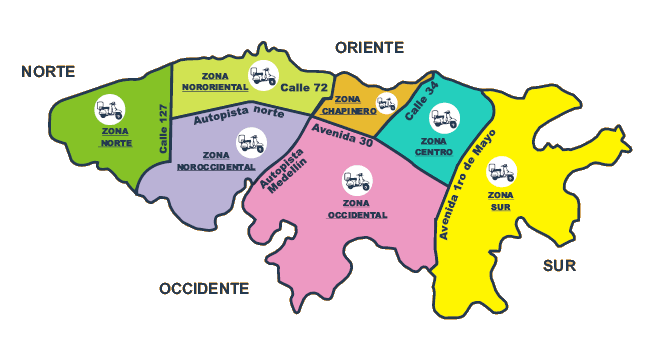

El gráfico no es muy claro, por lo que se decide modificar las variables por Precio_m2 vs Precio_Millon

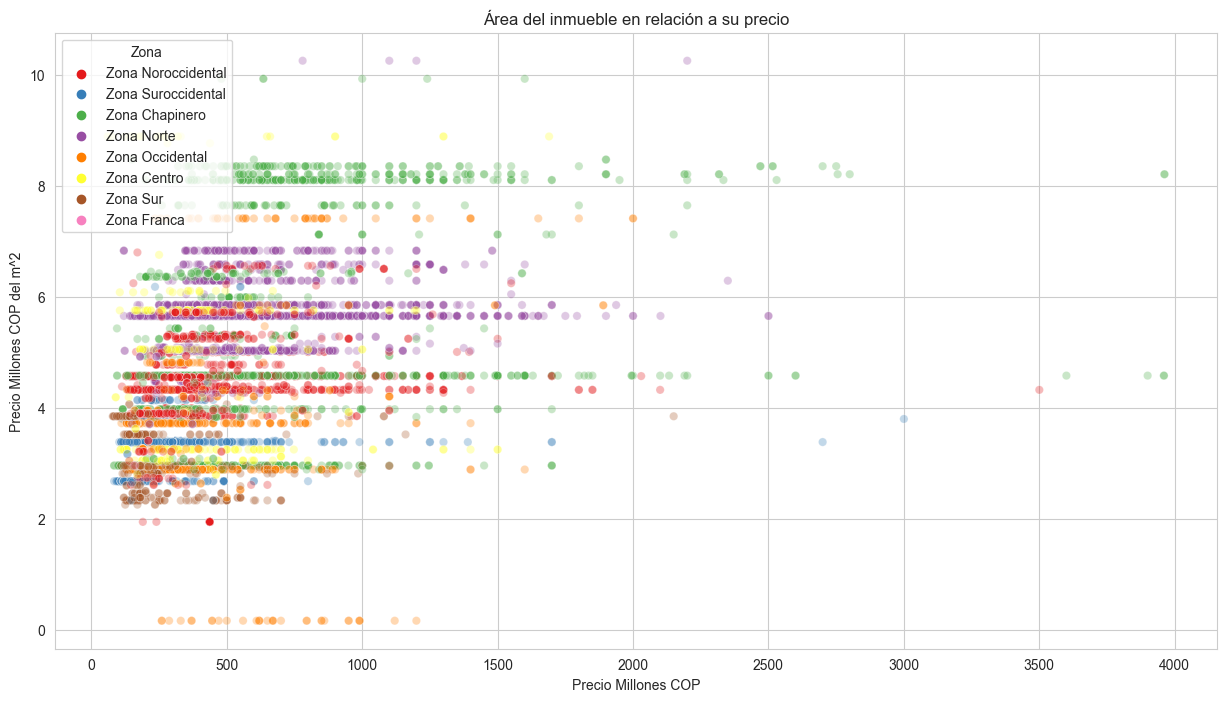

In [117]:
plt.figure(figsize=(15,8)) # figsize = (ancho, altura)
g4 = sns.scatterplot(data=inmuebles, x='Precio_Millon', y='Precio_m2', hue='Zona', alpha=0.3, palette='Set1')
g4.set_title('Área del inmueble en relación a su precio')
sns.move_legend(g4, loc='upper left')
plt.ylabel('Precio Millones COP del m^2')
plt.xlabel('Precio Millones COP')
plt.show()

- Se puede notar una predominancia de inmuebles ubicados en la Zona de Chapinero con un mayor precio por m^2.
- La mayoria de las zonas se agrupan en valores entre 7M y 2M por m^2. 
- La mayoría de los inmuebles de la Zona Suroccidental tienen un valor del m^2 menor a 4M.

In [114]:
inmuebles[['Precio_Millon', 'Precio_m2']].describe()

,Precio_Millon,Precio_m2
count,8576.00,8576.00
mean,465.22,4.61
std,348.78,1.47
min,60.00,0.16
25%,233.00,3.38
50%,380.00,4.57
75%,560.00,5.66
max,3961.96,10.25


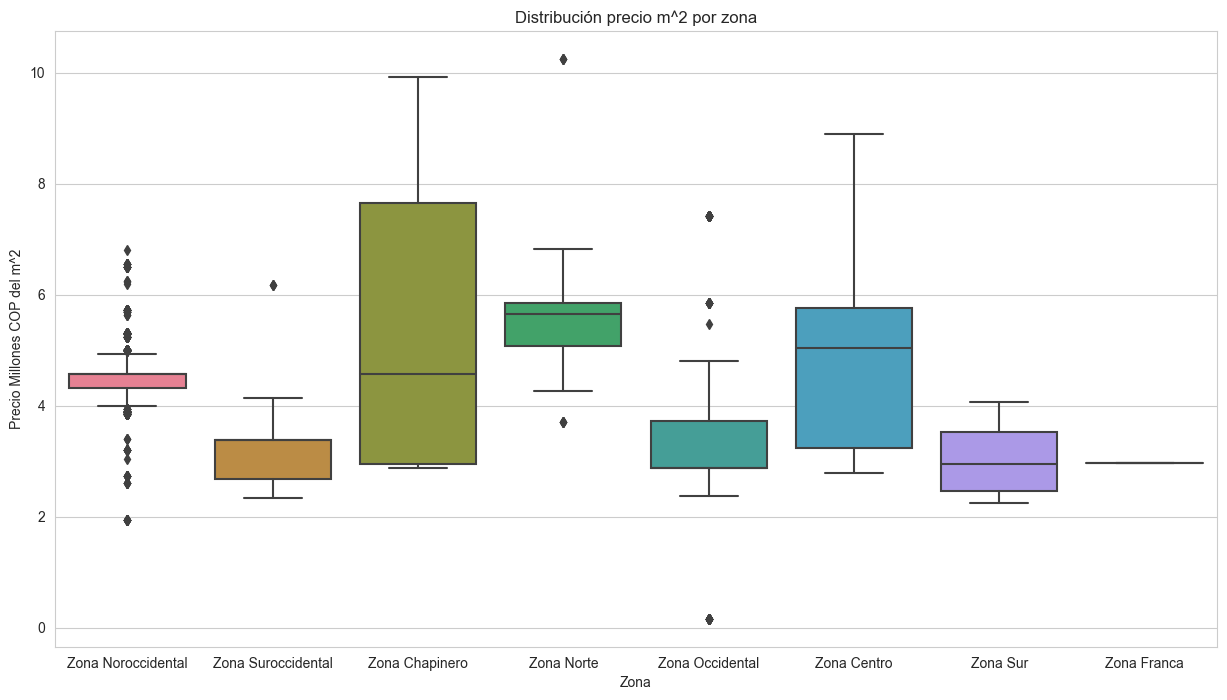

In [115]:
plt.figure(figsize=(15,8)) # figsize = (ancho, altura)
g4 = sns.boxplot(data=inmuebles, x='Zona', y='Precio_m2', palette='husl')
g4.set_title('Distribución precio m^2 por zona')
plt.ylabel('Precio Millones COP del m^2')
plt.xlabel('Zona')
plt.show()

In [116]:
inmuebles.to_csv('../data/inmuebles_bogota_mis_mod.csv')